<a href="https://colab.research.google.com/github/mohammedterryjack/Medium/blob/master/data_science_and_machine_learning_crash_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data (Data Science)

### 1) Collecting the raw *dataset*

In [135]:
numbers_as_words = [
  "one",
  "two",
  "three",
  "four",
  "five",
  "six",
  "seven",
  "eight",
  "nine",
  "ten"
]

### 2) Annotating the data

In [136]:
numbers_as_digits = list(range(1,11))
numbers_as_digits

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [137]:
from pandas import DataFrame

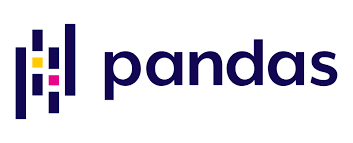

In [138]:
number_data = DataFrame(
    data=zip(numbers_as_words,numbers_as_digits),
    columns=['inputs','outputs']
)
number_data

,inputs,outputs
0,one,1
1,two,2
2,three,3
3,four,4
4,five,5
5,six,6
6,seven,7
7,eight,8
8,nine,9
9,ten,10


### 3) Encoding / embedding the data

many ways to embed data: 
- see here: https://medium.com/@b.terryjack/nlp-everything-about-word-embeddings-9ea21f51ccfe
- see here: https://medium.com/wluper/a-gentle-introduction-to-embedding-trees-and-graphs-with-code-92dc3b6b6ec7

**Word Vectors (Spacy)**

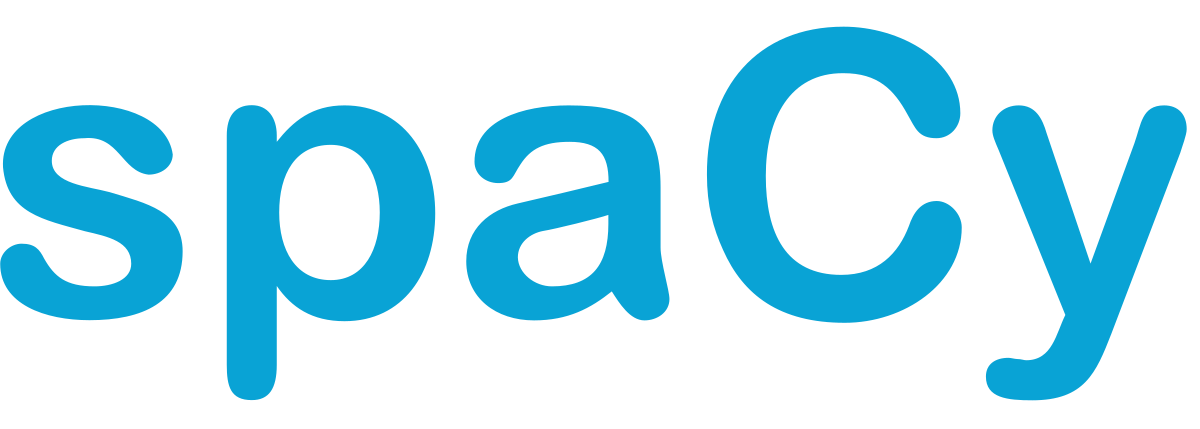

In [139]:
from spacy import load

In [140]:
word_encoder = load('en_core_web_sm')

In [141]:
input_vectors = [
  word_encoder(data_sample).vector for data_sample in numbers_as_words
]
input_vectors

[array([ 1.073466  , -1.3960369 ,  3.4759936 , -2.9446878 ,  0.14282471,
         0.71646535,  8.434513  ,  1.4058425 , -0.71034867,  2.0469954 ,
         1.5263054 ,  0.3362949 , -1.0762749 , -1.4386585 , -1.51675   ,
        -0.7203414 , -0.98248357, -0.8972959 , -0.8107591 , -1.0229948 ,
        -1.2417027 , -0.8330013 , -0.01483026, -1.4282398 , -2.4526105 ,
        -2.468108  , -1.468852  , -1.0580504 ,  0.8318286 ,  2.0131595 ,
         0.53346145,  0.54197407,  2.2204125 ,  4.2029996 ,  1.2958926 ,
        -2.511009  ,  2.623813  ,  1.5361395 ,  0.5352893 ,  0.5907743 ,
        -0.65294176, -2.0443811 , -2.105507  , -2.9505043 , -1.5148294 ,
        -1.7501999 , -1.3655311 , -1.734344  ,  1.2440536 ,  0.14566305,
        -0.66558146, -3.5800693 , -1.6817603 ,  1.5583556 ,  0.5748469 ,
         1.7867178 ,  4.03851   , -1.577755  ,  2.4963746 , -2.766207  ,
         1.8068274 ,  0.58341646,  1.784909  , -1.4267628 , -2.4814408 ,
        -3.3680408 ,  1.0290322 , -2.1542869 , -2.8

In [142]:
from seaborn import heatmap

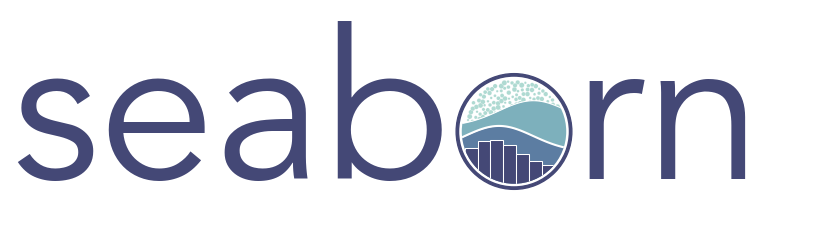

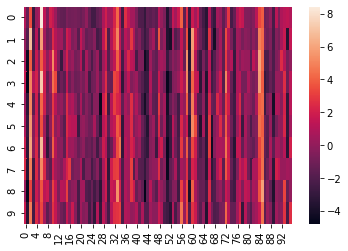

In [143]:
heatmap(input_vectors)

**One-shot Vectors (Numpy)**

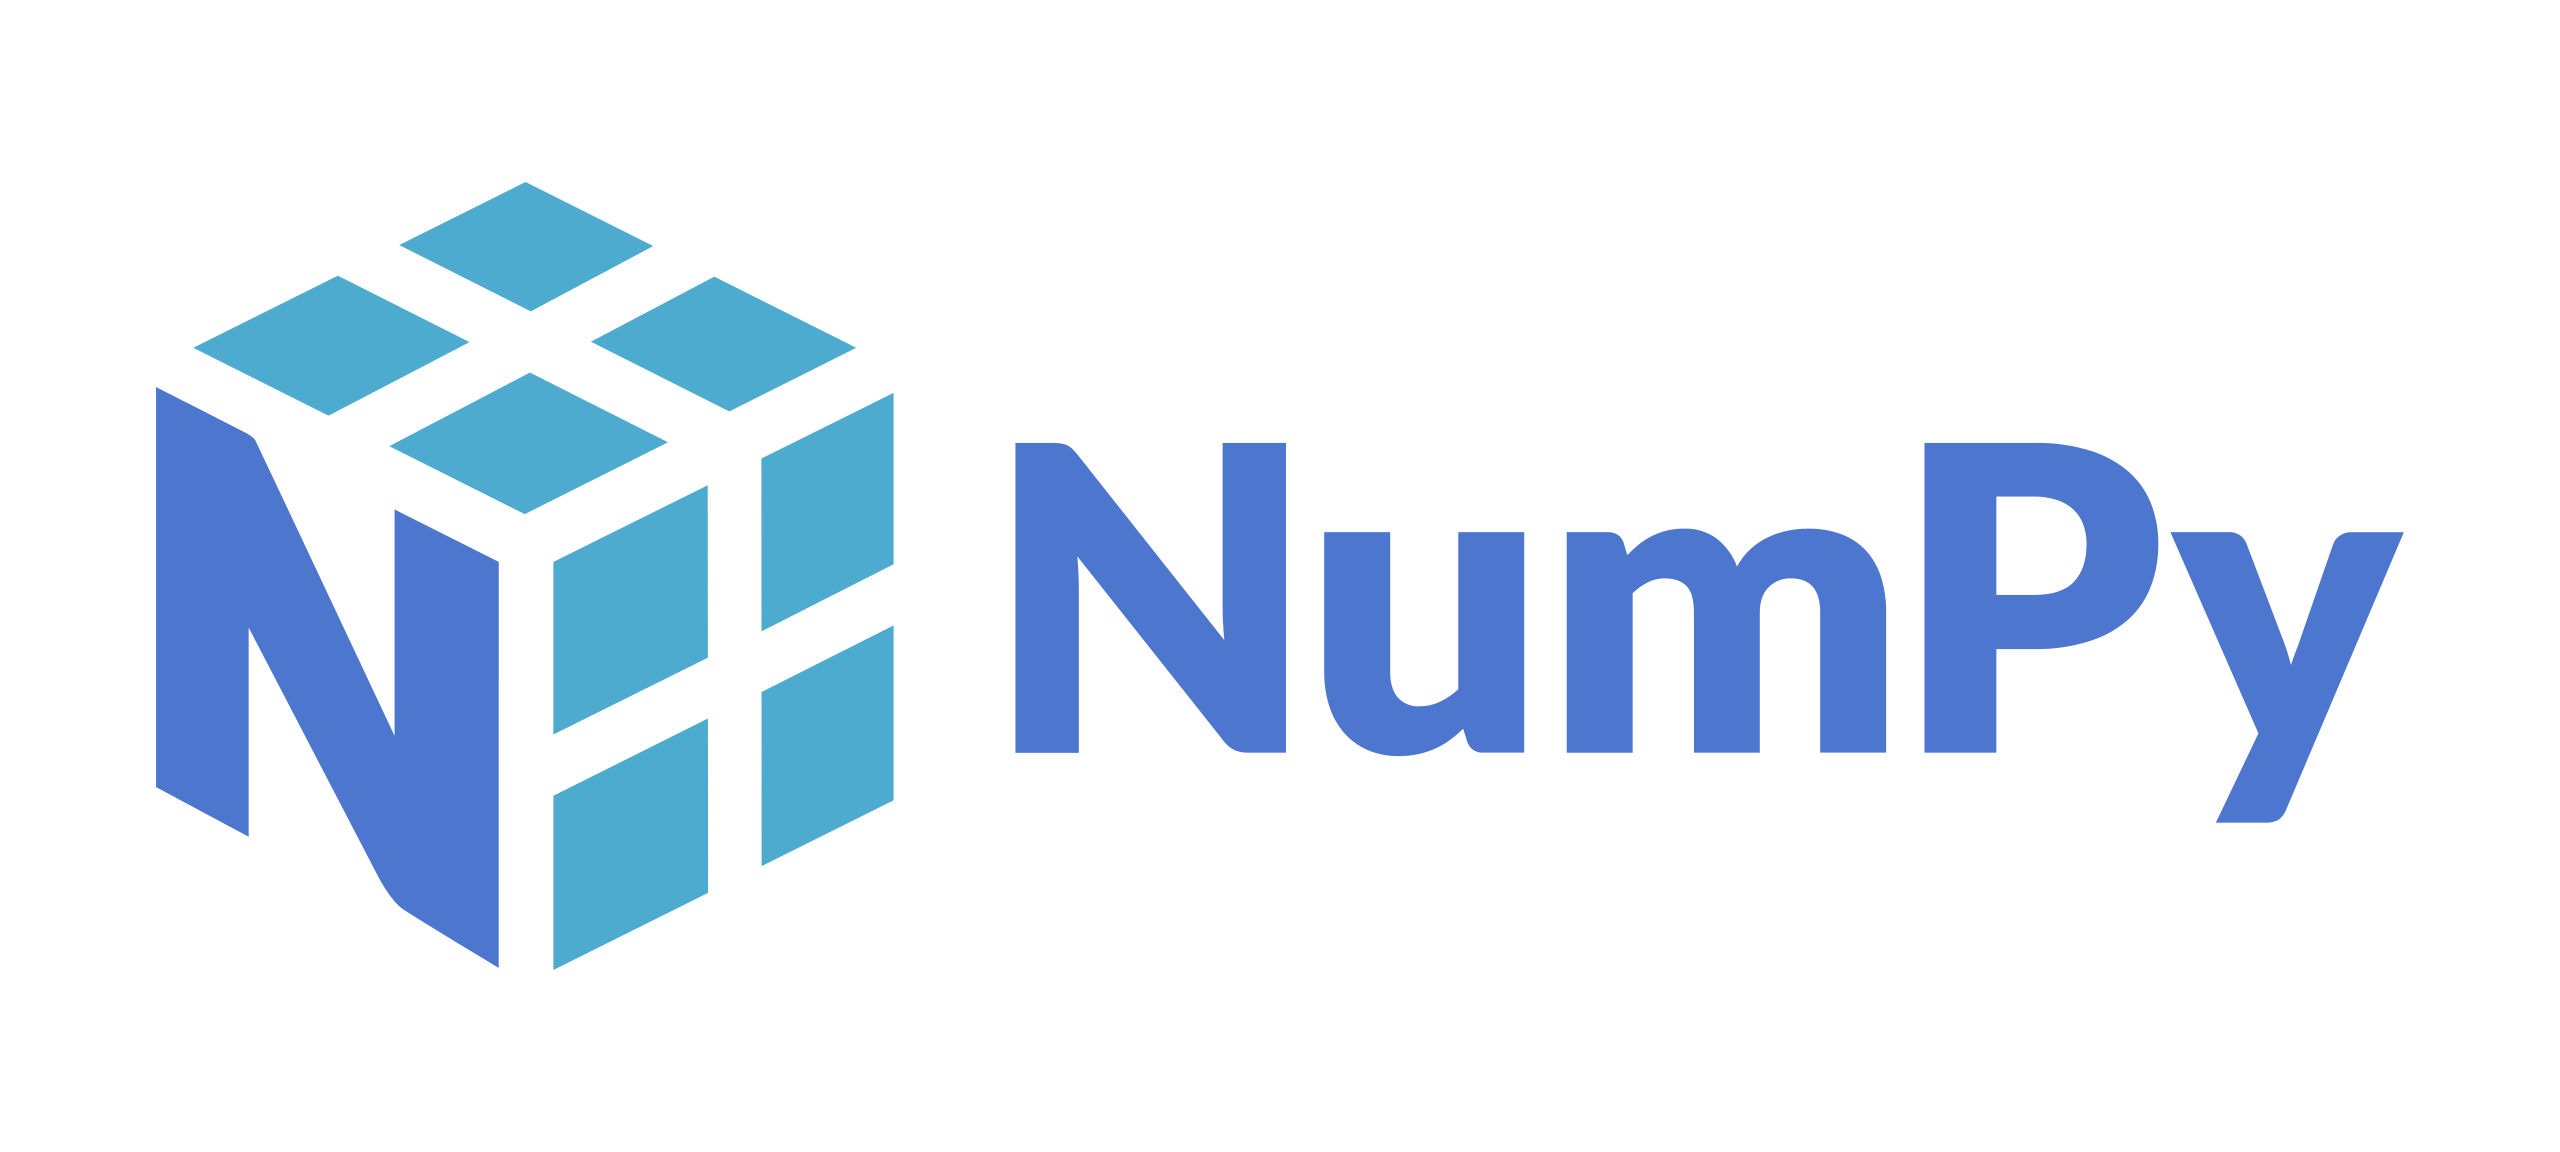

In [148]:
from numpy import eye

In [149]:
size_of_output_vector = len(numbers_as_digits) + 1
output_vectors = eye(size_of_output_vector)[numbers_as_digits]
output_vectors

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

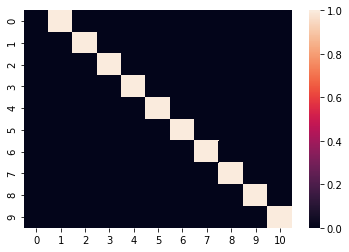

In [150]:
heatmap(output_vectors)

### 4) Visualising the data (for intuitive analysis)

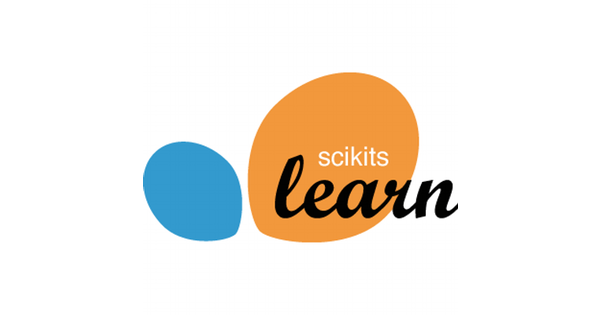

In [151]:
from sklearn.decomposition import PCA

In [152]:
number_of_dimensions = 2
dimensionality_reducer = PCA(n_components=number_of_dimensions)

In [153]:
input_coordinates = dimensionality_reducer.fit_transform(input_vectors)
input_coordinates

array([[10.91757937, -0.97234557],
       [-1.84998494,  0.5980126 ],
       [ 2.0269111 , -0.45692362],
       [ 1.5690585 , -6.02145593],
       [-3.23093375,  2.54382103],
       [-6.32546469, -1.28733154],
       [-3.44014792, -4.65526368],
       [ 0.50944513,  6.27566701],
       [ 0.5438596 ,  4.60697086],
       [-0.7203224 , -0.63115116]])

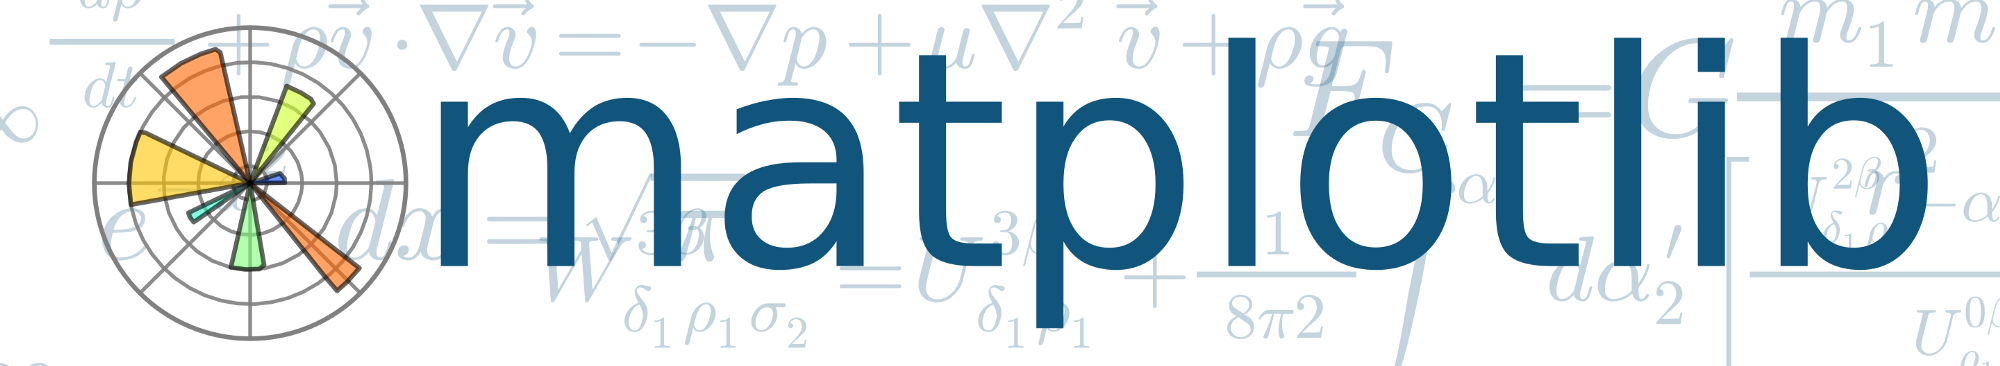

In [154]:
from matplotlib.pyplot import scatter, text

In [155]:
x_coordinates,y_coordinates = zip(*input_coordinates)

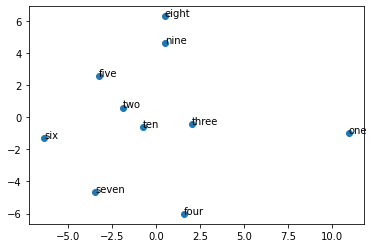

In [156]:
scatter(x_coordinates,y_coordinates)
for sample,x,y in zip(numbers_as_words,x_coordinates,y_coordinates):
  text(x=x, y=y, s=sample)


# Model (Machine Learning)

so many models in Sci-kit learn 
- SVM
- NN
- Decision Tree
- Nearest Neighbour
- XLBoost
- etc
- see here: https://medium.com/@b.terryjack/tips-and-tricks-for-multi-class-classification-c184ae1c8ffc
- see here: https://medium.com/swlh/amazing-alternatives-to-classifiers-b7bd7e85b60d

In [157]:
from sklearn.neural_network import MLPClassifier

In [158]:
classifier = MLPClassifier()

In [159]:
classifier.fit(input_vectors, output_vectors)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [160]:
predicted_outputs_vectors = classifier.predict(input_vectors)
predicted_outputs_vectors

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

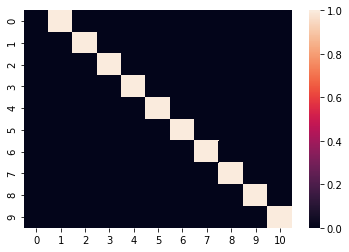

In [161]:
heatmap(predicted_outputs_vectors)

In [163]:
while True:
  new_word = input("\ninput: ")
  if not any(new_word): break
  new_input_vector = word_encoder(new_word).vector
  predicted_output_vectors = classifier.predict([new_input_vector])
  predicted_output_vector = predicted_output_vectors[0]
  predicted_number = predicted_output_vector.argmax()
  print(f"prediction: {predicted_number}")


input: 


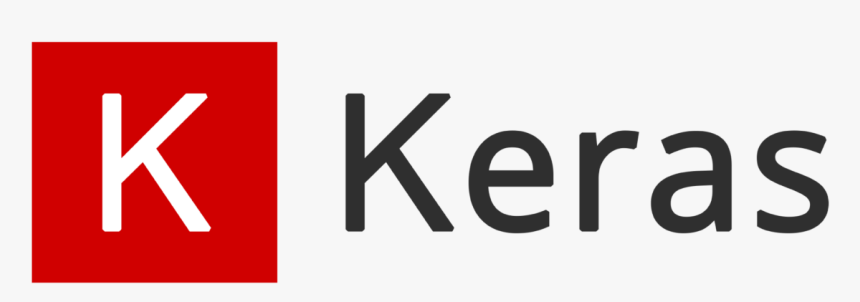

In [164]:
from keras.models import Sequential

In [165]:
classifier2 = Sequential()

In [166]:
input_vector_dimension = len(input_vectors[0])
number_of_inputs = len(input_vectors)


from keras.layers import Dense
input_layer = Dense(number_of_inputs, input_dim=input_vector_dimension, activation='relu')
hidden_layer = Dense(200, activation='relu')
output_layer = Dense(size_of_output_vector, activation="softmax")

In [167]:
classifier2 = Sequential(
    [
        input_layer,
        hidden_layer,
        output_layer,
    ]
)

In [168]:
classifier2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                970       
_________________________________________________________________
dense_13 (Dense)             (None, 200)               2200      
_________________________________________________________________
dense_14 (Dense)             (None, 11)                2211      
Total params: 5,381
Trainable params: 5,381
Non-trainable params: 0
_________________________________________________________________


In [169]:
classifier2.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [183]:
classifier2.fit(array(input_vectors), output_vectors, epochs=70)

Epoch 1/70
1/1 [==============================] - 0s 6ms/step - loss: 1.7592 - accuracy: 0.7000
Epoch 2/70
1/1 [==============================] - 0s 6ms/step - loss: 1.7136 - accuracy: 0.8000
Epoch 3/70
1/1 [==============================] - 0s 7ms/step - loss: 1.6682 - accuracy: 0.8000
Epoch 4/70
1/1 [==============================] - 0s 9ms/step - loss: 1.6227 - accuracy: 0.8000
Epoch 5/70
1/1 [==============================] - 0s 6ms/step - loss: 1.5778 - accuracy: 0.8000
Epoch 6/70
1/1 [==============================] - 0s 11ms/step - loss: 1.5330 - accuracy: 0.8000
Epoch 7/70
1/1 [==============================] - 0s 8ms/step - loss: 1.4880 - accuracy: 0.8000
Epoch 8/70
1/1 [==============================] - 0s 11ms/step - loss: 1.4423 - accuracy: 0.9000
Epoch 9/70
1/1 [==============================] - 0s 8ms/step - loss: 1.3965 - accuracy: 0.9000
Epoch 10/70
1/1 [==============================] - 0s 6ms/step - loss: 1.3524 - accuracy: 0.9000
Epoch 11/70
1/1 [====================

In [184]:
predicted_output_vectors = classifier2.predict(array(input_vectors))
predicted_output_vectors

array([[9.26584253e-05, 9.59432364e-01, 1.08357395e-04, 1.00974145e-03,
        1.35468841e-02, 3.56225111e-03, 1.34792924e-03, 1.14252800e-02,
        1.33084040e-05, 8.17811873e-04, 8.64344742e-03],
       [4.89809318e-05, 1.61652279e-04, 9.04328465e-01, 4.56756121e-03,
        3.02647735e-04, 2.77536921e-02, 4.20184359e-02, 1.89106120e-03,
        8.36453959e-03, 1.05393389e-02, 2.35548905e-05],
       [2.67835148e-05, 1.27911288e-03, 2.64717429e-03, 9.82246816e-01,
        1.54291120e-04, 2.07846868e-03, 3.72920162e-03, 3.37518373e-04,
        2.72756442e-03, 4.57989564e-03, 1.93246684e-04],
       [5.33449793e-06, 9.32648964e-03, 1.30119151e-04, 1.99160531e-05,
        9.54912782e-01, 1.98285468e-02, 6.49458252e-06, 4.04900376e-04,
        2.51148613e-05, 3.88164259e-03, 1.14586363e-02],
       [8.82893364e-05, 4.00075736e-03, 3.37372199e-02, 1.10558618e-03,
        1.92392059e-02, 8.93553793e-01, 2.73506716e-03, 1.05030434e-02,
        1.23338224e-02, 1.04492418e-02, 1.22539336e-

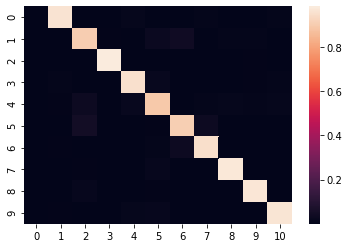

In [185]:
heatmap(predicted_output_vectors)

In [186]:
while True:
  new_word = input("\ninput: ")
  if not any(new_word): break
  new_input_vector = word_encoder(new_word).vector
  predicted_output_vectors = classifier2.predict(array([new_input_vector]))
  predicted_output_vector = predicted_output_vectors[0]
  predicted_number = predicted_output_vector.argmax()
  print(f"prediction: {predicted_number}")


input: one
prediction: 1

input: eleven
prediction: 7

input: seven 
prediction: 7

input: 
